In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score , confusion_matrix , precision_recall_fscore_support
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
%pwd

'd:\\Data science\\Machine Learning Algorithms\\ML projects\\Crop recomendation\\End-to-End-crop-recommendation-system\\research'

In [4]:
os.chdir("..")

In [5]:
data = pd.read_csv('data/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Data Preparation

In [6]:
# separate the input and output data
x = data.drop('label' , axis=1)
y = data['label']


In [9]:
print(f"There are {y.nunique()} recommended crops") 
print(f"crops are : {y.unique()}")

There are 22 recommended crops
crops are : ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [10]:
y = data['label'].map({ 'rice':1, 
        'maize'       : 2, 
        'chickpea'    : 3  ,
        'kidneybeans' : 4  ,
        'pigeonpeas'  : 5  ,
        'mothbeans'   : 6  , 
        'mungbean'    : 7   , 
        'blackgram'   : 8  , 
        'lentil'      : 9  ,
        'pomegranate' : 10    ,
        'banana'      : 11   , 
        'mango'       : 12   , 
        'grapes'      : 13   , 
        'watermelon'  : 14   , 
        'muskmelon'   : 15   , 
        'apple'       : 16   ,
        'orange'      : 17   , 
        'papaya'      : 18   , 
        'coconut'     : 19   ,
        'cotton'      : 20   , 
        'jute'        : 21   , 
        'coffee'      : 22   })

In [13]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


## Splitting data into training and testing

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,shuffle=True ,  random_state=42)

In [15]:
print(f"input data for model training is {x_train.shape}")
print(f"input labels for model training is {y_train.shape}")
print(f"output data for model training is {x_test.shape}")
print(f"output labels for model training is {y_test.shape}")


input data for model training is (1760, 7)
input labels for model training is (1760,)
output data for model training is (440, 7)
output labels for model training is (440,)


## building model

#### 1. Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier()
tree.fit(x_train , y_train)

DecisionTreeClassifier()

In [22]:
y_pred = tree.predict(x_test)

In [24]:
print(f"the training accuracy of model {tree.score(x_train , y_train)}")
print(f"the accuracy of Decision Tree Classifier is {round(accuracy_score(y_pred , y_test),2)}")

the training accuracy of model 1.0
the accuracy of Decision Tree Classifier is 0.98


#### 2. Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200 , max_depth=7)
classifier.fit(x_train , y_train)

RandomForestClassifier(max_depth=7, n_estimators=200)

In [48]:
y_pred = classifier.predict(x_test)

In [70]:
x_train_preds = classifier.predict(x_train)

In [75]:
print(f"training accuracy of model {round(accuracy_score(x_train_preds , y_train),3)}")
print(f"accuracy of Random Forest Classifier is {round(accuracy_score(y_pred , y_test),3)}")

training accuracy of model 0.997
accuracy of Random Forest Classifier is 0.989


In [77]:
precision , recall , f1_score , support = precision_recall_fscore_support(y_test , y_pred , average='weighted') 
print(f"precision of model : {precision}")
print(f"recall of model : {recall}")
print(f"f1_score of model : {f1_score}")


precision of model : 0.9889971139971139
recall of model : 0.9886363636363636
f1_score of model : 0.9885950689649838


- by seeing above model not get overfit

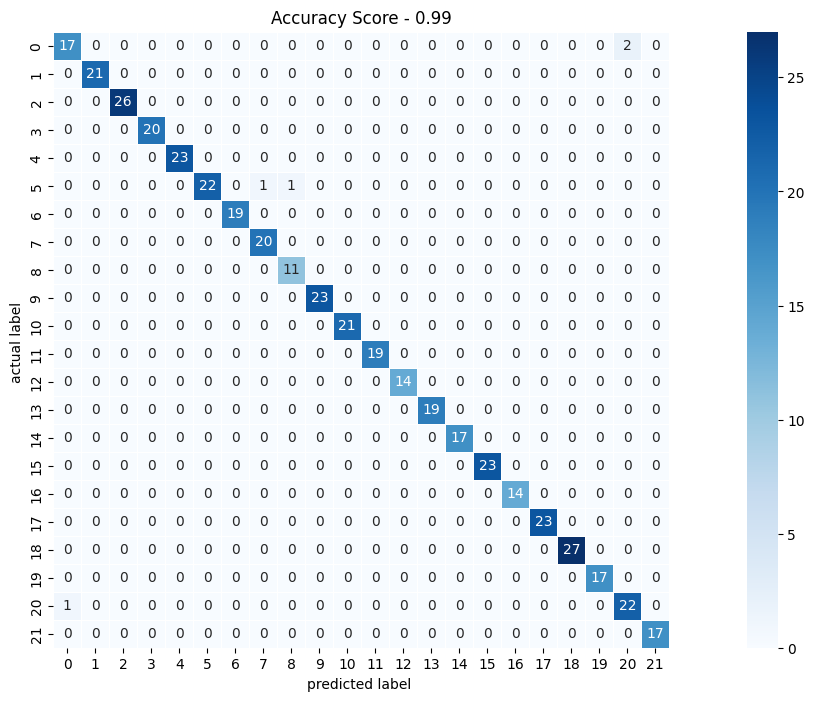

In [50]:
cm = confusion_matrix(y_test , y_pred) 
plt.figure(figsize=(20,8))
plt.title(f'Accuracy Score - {round(accuracy_score(y_pred , y_test),2)}')
sns.heatmap(cm ,annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.xlabel('predicted label ')
plt.ylabel('actual label ')
plt.show()

### Both decision tree and Random forest give best result so we use any one model

### Creating prediction function

In [51]:
class_name = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

In [52]:
def make_prediction(input_data ,model ,  class_name = class_name):
    pred = model.predict([input_data])
    op = class_name[pred[0]-1]
    return "the predicted crop is " +op
    
make_prediction([45,50,40,46.879744,90,9.502985,120.491012] , model=tree)

'the predicted crop is papaya'

In [54]:
# predictions random forest classifier 
make_prediction([32,50,20,36.879744,90,9.502985,120.491012] , model=classifier)

'the predicted crop is mungbean'

### save model

In [56]:
import pickle 

save_directory = "pickle_model/"

In [59]:
pickle.dump(classifier ,open(save_directory+'app.sav' ,'wb'))

In [66]:
# loading saved pickle model
load_model = pickle.load(open(save_directory+'app.sav','rb')) 

make_prediction([29,64,27,35.879744,90,5.502985,112] , model=load_model)

'the predicted crop is papaya'